In [2]:
import torch as th
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

### ULTRALYTICS YOLOV5 DOCS:-https://docs.ultralytics.com/yolov5/
### ULTRALYTICS YOLOV5 HUB GUIDE:-https://docs.ultralytics.com/yolov5/tutorials/pytorch_hub_model_loading/
### ULTRALYTICS YOLOV5 GITHUB Link:-https://github.com/ultralytics/yolov5/tree/30e4c4f09297b67afedf8b2bcd851833ddc9dead

In [3]:
VIDEO_LOC = r"E:\PyImage_ComputerVision\ObjectDetectionYolo\WorkingData\InputData\cctv.mp4"
IMG_LOC = r"E:\PyImage_ComputerVision\ObjectDetectionYolo\WorkingData\InputData\zidane.jpg"

In [4]:
import math


class Tracker:
    def __init__(self):
        # Store the center positions of the objects
        self.center_points = {}
        # Keep the count of the IDs
        # each time a new object id detected, the count will increase by one
        self.id_count = 0


    def update(self, objects_rect):
        # Objects boxes and ids
        objects_bbs_ids = []

        # Get center point of new object
        for rect in objects_rect:
            x, y, w, h = rect
            cx = (x + x + w) // 2
            cy = (y + y + h) // 2
            print(cx,cy)
            # Find out if that object was detected already
            same_object_detected = False
            for id, pt in self.center_points.items():
                dist = math.hypot(cx - pt[0], cy - pt[1])

                if dist < 35:
                    self.center_points[id] = (cx, cy)
#                   print(self.center_points)
                    objects_bbs_ids.append([x, y, w, h, id])
                    same_object_detected = True
                    break

            # New object is detected we assign the ID to that object
            if same_object_detected is False:
                self.center_points[self.id_count] = (cx, cy)
                objects_bbs_ids.append([x, y, w, h, self.id_count])
                self.id_count += 1

        # Clean the dictionary by center points to remove IDS not used anymore
        new_center_points = {}
        for obj_bb_id in objects_bbs_ids:
            _, _, _, _, object_id = obj_bb_id
            center = self.center_points[object_id]
            new_center_points[object_id] = center

        # Update dictionary with IDs not used removed
        self.center_points = new_center_points.copy()
        return objects_bbs_ids

In [1]:
model = th.hub.load('ultralytics/yolov5','yolov5s',pretrained=True,device="cpu")

NameError: name 'th' is not defined

In [4]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [57]:
cctv = cv2.VideoCapture(VIDEO_LOC)

In [58]:
cctv.isOpened()

True

In [59]:
cctv.get(cv2.CAP_PROP_FRAME_COUNT)

16540.0

In [60]:
cctv.get(cv2.CAP_PROP_FPS)

15.0

In [61]:
cctv.get(cv2.CAP_PROP_FRAME_HEIGHT)

720.0

In [62]:
cctv.get(cv2.CAP_PROP_FRAME_WIDTH)

1280.0

In [11]:
_,img1 = cctv.read()
img1 = cv2.resize(img1,(1080,520))

In [12]:
cv2.imshow("Image 1",img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
preds = model(img1).pred[0]

In [14]:
preds

tensor([[6.37389e+02, 1.61243e+02, 1.00748e+03, 3.58625e+02, 9.13532e-01, 2.00000e+00],
        [3.04328e+02, 7.16369e+01, 4.40496e+02, 1.39217e+02, 8.62600e-01, 2.00000e+00],
        [7.74707e+01, 1.29038e+02, 3.73644e+02, 3.64608e+02, 8.51276e-01, 2.00000e+00],
        [4.78089e+02, 1.81637e+02, 5.68572e+02, 3.98650e+02, 7.87907e-01, 0.00000e+00],
        [1.91382e+02, 6.33484e+01, 2.12451e+02, 1.15104e+02, 7.85023e-01, 0.00000e+00],
        [1.57205e+02, 6.20721e+01, 1.79469e+02, 1.17132e+02, 7.46152e-01, 0.00000e+00],
        [2.39885e+02, 4.49901e+01, 3.28601e+02, 1.05403e+02, 6.08947e-01, 2.00000e+00],
        [6.52304e+02, 1.32854e+02, 6.89130e+02, 1.81336e+02, 5.29433e-01, 0.00000e+00],
        [4.99263e+00, 3.76696e+02, 1.12364e+02, 5.12792e+02, 3.89041e-01, 5.80000e+01],
        [5.12804e+02, 2.34696e+02, 5.67568e+02, 3.14843e+02, 3.12925e-01, 2.40000e+01],
        [4.56577e+02, 7.76437e+01, 4.73581e+02, 1.19100e+02, 2.92431e-01, 0.00000e+00]])

In [101]:
idx_to_cls = results.names

In [102]:
idx_to_cls

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [23]:
out = img1.copy()
for pred in preds:
    x1 = int(pred[0])
    y1 = int(pred[1])
    x2 = int(pred[2])
    y2 = int(pred[3])
    conf = float(pred[4])
    cls = int(pred[5])
    cx = (x1+x2)//2
    cy = (y1+y2)//2
    cv2.rectangle(out,(x1,y1),(x2,y2),(0,255,0),2)
    cv2.circle(out,(cx,cy),3,(255,0,0),-1)
    cv2.imshow("Output Image",out)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [22]:
results = model(img1).pandas().xyxy[0]
results

,xmin,ymin,xmax,ymax,confidence,class,name
0,637.389404,161.243088,1007.478516,358.625458,0.913532,2,car
1,304.328369,71.636879,440.495941,139.216888,0.862600,2,car
2,77.470673,129.038483,373.643707,364.608337,0.851276,2,car
3,478.089325,181.636505,568.572021,398.649658,0.787907,0,person
4,191.382446,63.348392,212.451324,115.103790,0.785023,0,person
5,157.204865,62.072079,179.469330,117.132004,0.746152,0,person
6,239.884827,44.990147,328.601196,105.402908,0.608947,2,car
7,652.303894,132.853745,689.129761,181.335785,0.529433,0,person
8,4.992630,376.695923,112.363525,512.791870,0.389041,58,potted plant
9,512.803833,234.696060,567.568298,314.843048,0.312925,24,backpack


In [ ]:
model.to()

In [110]:
DEVICE = "cuda" if th.cuda.is_available() else "cpu"
DEVICE

'cpu'

In [111]:
th.cuda.is_available()

False

In [6]:
cctv = cv2.VideoCapture(VIDEO_LOC)

In [7]:
cctv.isOpened()

True

In [10]:
model.to()
trk = Tracker()
while cctv.isOpened():
    ret,frame = cctv.read()
    if ret == False:
        break
    frame = cv2.cvtColor(cv2.resize(frame,(1080,520)),cv2.COLOR_BGR2RGB)
    preds = model(frame).pred[0]
    list = []
    for pred in preds:
        cls = int(pred[5])
        if cls == 0:
            x1 = int(pred[0])
            y1 = int(pred[1])
            x2 = int(pred[2])
            y2 = int(pred[3])
            conf = round(float(pred[4]))
            list.append([x1,y1,x2,y2])
    box_ids = trk.update(list)
    for bx in box_ids:
        x,y,w,h,id = bx
        cv2.rectangle(frame,(x,y),(w,h),(0,255,0),2)
        cv2.putText(frame,f"",(x,y),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),2)
    cv2.imshow("Output",frame)
    key = cv2.waitKey(0)
    if key == ord('q'):
        cv2.destroyAllWindows()
    if key == ord("x"):
        cv2.destroyAllWindows()
        break

In [9]:
model.to()
trk = Tracker()
count = 0
while cctv.isOpened():
    ret,frame = cctv.read()
    if ret == False:
        break
    count += 1
    frame = cv2.cvtColor(cv2.resize(frame,(1080,520)),cv2.COLOR_BGR2RGB)
    preds = model(frame).pred[0]
    list = []
    for pred in preds:
        cls = int(pred[5])
        if cls == 0:
            x1 = int(pred[0])
            y1 = int(pred[1])
            x2 = int(pred[2])
            y2 = int(pred[3])
            conf = round(float(pred[4]))
            list.append([x1,y1,x2,y2])
    box_ids = trk.update(list)
    for bx in box_ids:
        x,y,w,h,id = bx
        cv2.rectangle(frame,(x,y),(w,h),(0,255,0),2)
        cv2.putText(frame,f"",(x,y),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),2)
        cv2.imshow(f"Output{count}",frame)
        key = cv2.waitKey(0)
        if key == ord('q'):
            cv2.destroyAllWindows()
        if key == ord("x"):
            cv2.destroyAllWindows()
            break
    if key == ord("x"):
        break

766 389
248 118
300 118
998 223
126 320
764 378
247 118
299 119
998 224
125 320


In [22]:
zdn = cv2.cvtColor(cv2.imread(IMG_LOC),cv2.COLOR_BGR2RGB)

In [23]:
h,w,_ = zdn.shape

In [24]:
h

720

In [25]:
w

1280

In [26]:
results = model(zdn)

In [27]:
results

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 720x1280 2 persons, 2 ties
Speed: 7.0ms pre-process, 91.7ms inference, 1.0ms NMS per image at shape (1, 3, 384, 640)

In [28]:
type(results)

models.common.Detections

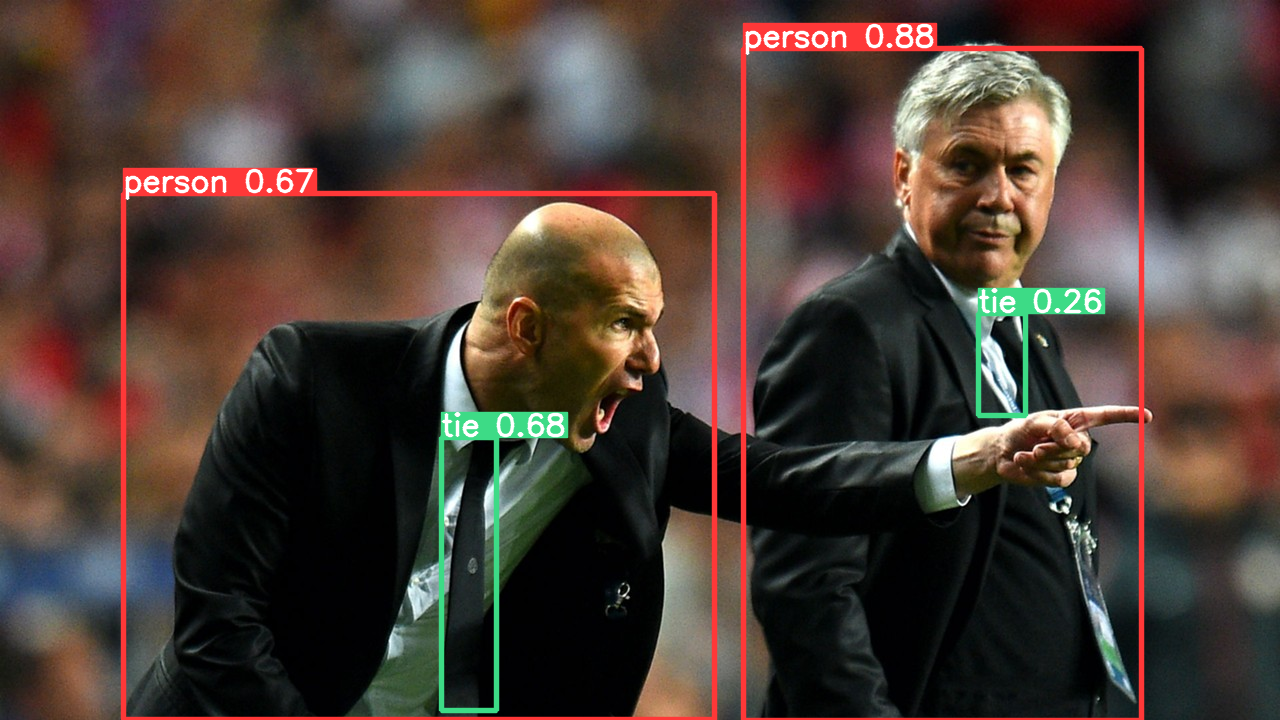

In [29]:
results.show()

In [30]:
results.pred

[tensor([[7.43290e+02, 4.83437e+01, 1.14176e+03, 7.20000e+02, 8.79861e-01, 0.00000e+00],
         [4.41990e+02, 4.37337e+02, 4.96585e+02, 7.10036e+02, 6.75119e-01, 2.70000e+01],
         [1.23051e+02, 1.93238e+02, 7.14691e+02, 7.19771e+02, 6.66693e-01, 0.00000e+00],
         [9.78990e+02, 3.13579e+02, 1.02530e+03, 4.15526e+02, 2.61517e-01, 2.70000e+01]])]

In [31]:
results.names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [35]:
results.ims[0].shape

(720, 1280, 3)

In [36]:
results.files

['image0.jpg']

In [37]:
results.times

(<utils.general.Profile at 0x1695c7ea650>,
 <utils.general.Profile at 0x1695c807010>)

In [38]:
results.xyxy

[tensor([[7.43290e+02, 4.83437e+01, 1.14176e+03, 7.20000e+02, 8.79861e-01, 0.00000e+00],
         [4.41990e+02, 4.37337e+02, 4.96585e+02, 7.10036e+02, 6.75119e-01, 2.70000e+01],
         [1.23051e+02, 1.93238e+02, 7.14691e+02, 7.19771e+02, 6.66693e-01, 0.00000e+00],
         [9.78990e+02, 3.13579e+02, 1.02530e+03, 4.15526e+02, 2.61517e-01, 2.70000e+01]])]

In [39]:
results.pred

[tensor([[7.43290e+02, 4.83437e+01, 1.14176e+03, 7.20000e+02, 8.79861e-01, 0.00000e+00],
         [4.41990e+02, 4.37337e+02, 4.96585e+02, 7.10036e+02, 6.75119e-01, 2.70000e+01],
         [1.23051e+02, 1.93238e+02, 7.14691e+02, 7.19771e+02, 6.66693e-01, 0.00000e+00],
         [9.78990e+02, 3.13579e+02, 1.02530e+03, 4.15526e+02, 2.61517e-01, 2.70000e+01]])]

In [40]:
results.xyxyn

[tensor([[ 0.58070,  0.06714,  0.89200,  1.00000,  0.87986,  0.00000],
         [ 0.34530,  0.60741,  0.38796,  0.98616,  0.67512, 27.00000],
         [ 0.09613,  0.26839,  0.55835,  0.99968,  0.66669,  0.00000],
         [ 0.76484,  0.43553,  0.80102,  0.57712,  0.26152, 27.00000]])]

In [104]:
results.xywh ##yolo Format (x,y) Center and (w,h) is width and height

[tensor([[9.42523e+02, 3.84172e+02, 3.98466e+02, 6.71656e+02, 8.79861e-01, 0.00000e+00],
         [4.69287e+02, 5.73686e+02, 5.45955e+01, 2.72699e+02, 6.75119e-01, 2.70000e+01],
         [4.18871e+02, 4.56505e+02, 5.91640e+02, 5.26533e+02, 6.66693e-01, 0.00000e+00],
         [1.00215e+03, 3.64553e+02, 4.63130e+01, 1.01947e+02, 2.61517e-01, 2.70000e+01]])]

In [42]:
results.xywhn

[tensor([[ 0.73635,  0.53357,  0.31130,  0.93286,  0.87986,  0.00000],
         [ 0.36663,  0.79679,  0.04265,  0.37875,  0.67512, 27.00000],
         [ 0.32724,  0.63403,  0.46222,  0.73130,  0.66669,  0.00000],
         [ 0.78293,  0.50632,  0.03618,  0.14159,  0.26152, 27.00000]])]

In [43]:
results.s

(1, 3, 384, 640)

In [44]:
results.t

(7.0095062255859375, 91.72940254211426, 0.9944438934326172)

In [46]:
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 7.0ms pre-process, 91.7ms inference, 1.0ms NMS per image at shape (1, 3, 384, 640)


In [53]:
fg = results.pandas()

In [55]:
fg.xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,743.290405,48.343658,1141.756592,720.000000,0.879861,0,person
1,441.989624,437.336731,496.585083,710.036194,0.675119,27,tie
2,123.051147,193.238098,714.690735,719.771301,0.666693,0,person
3,978.989807,313.579468,1025.302856,415.526184,0.261517,27,tie


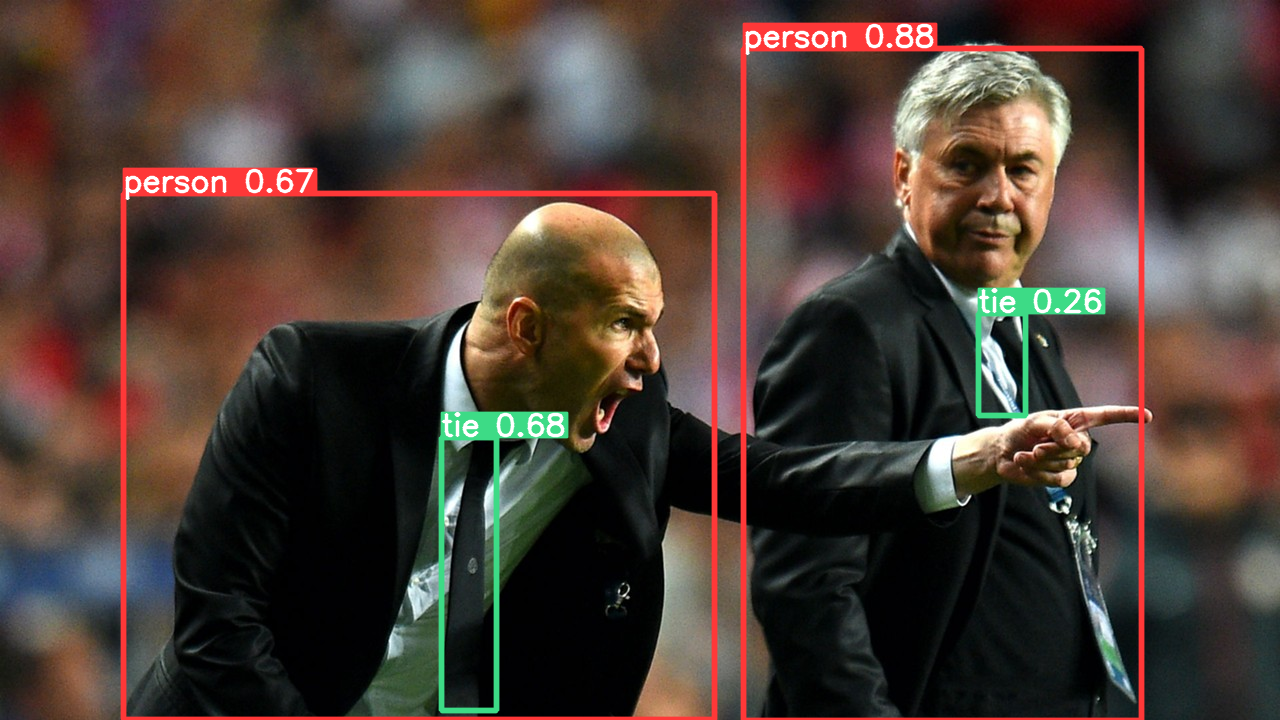

In [56]:
results.show()